In [ ]:
#import all libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Reading data from remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)

print("Data Imported Successfully")

s_data.head(15)


Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


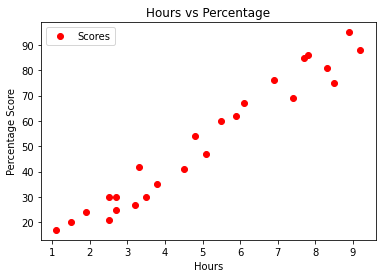

In [ ]:
#plottting the distribution of scores
s_data.plot(x='Hours',y='Scores',style='o', c="r")
plt.title('Hours vs Percentage')
plt.ylabel('Percentage Score')
plt.show()

#Preparing the data

The next step is divide the data into "attributes" (inputs) and "labels" (outputs).

In [ ]:
X = s_data.iloc[:, :-1].values 
y = s_data.iloc[:, 1].values 

In [ ]:
#Data Preparation
x = s_data[["Hours"]].values
y = s_data[["Scores"]].values

In [ ]:
x,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]), array([[21],
        [47],
        [27],
        [75],
        [30],
        [20],
        [88],
        [60],
        [81],
        [25],
        [85],
        [62],
        [41],
        [42],
        [17],
        [95],
        [30],
        [24],
        [67],
        [69],
        [30],
        [54],
        [35],
        [76],
        [86]]))

"Now that we have our attributes and labels, the next step is to split this data into training and test sets. Well do this by using Scikit-Learns built-in train_test_split() method:"

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0) 

**Training the Algorithm**,


We have to split our data into training and testing sets, and now is finally the time to train our algorithm.

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete")

Training complete


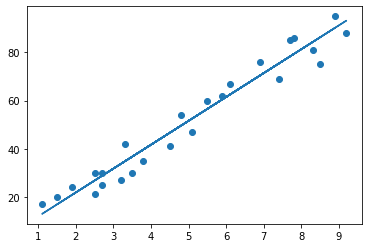

In [ ]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

 **Making Predictions**,


"Now that we have trained our algorithm, it's time to make some predictions."

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
#Comparing Actual vs Predicted
df = pd.DataFrame({'Actual':[y_test], 'Predicted': [y_pred]})
df

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [ ]:
  score_pred=np.array([2.5])
score_pred=score_pred.reshape(-1,1)
predict=regressor.predict(score_pred)
print("No of hours={}".format(2.5))
print("Predicted Score={}".format(predict[0]))


No of hours=2.5
Predicted Score=[26.79480124]


#Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:' ,metrics.mean_absolute_error(y_test , y_pred))

Mean Absolute Error: 4.183859899002982
